In [1]:
import pandas as pd

# Models 
from sklearn import cluster
from sklearn import model_selection, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestCentroid

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

# Score functions
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import silhouette_score


# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Functions
from functions import *

## Reading .csv file

In [2]:
# read .csv from provided dataset
pulsar_data="./Data/HTRU_2.csv"
data = pd.read_csv(pulsar_data)

In [3]:
data.head()

,M1,ST1,EX1,SK1,M2,ST2,EX2,SK2,C
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


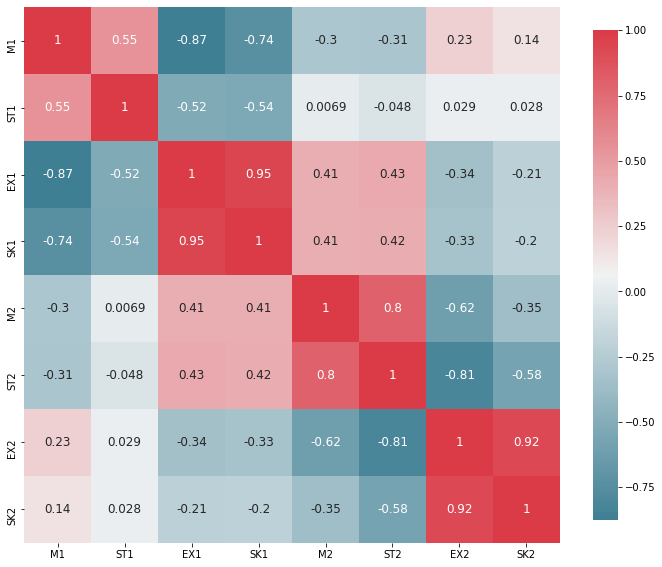

In [4]:
cols = list(data.columns)
features = cols
features.remove('C')

X = data[features]
Y = data['C']

plot_correlation_map(X)

In [5]:
X = StandardScaler().fit_transform(X)

In [6]:
# Split dataset to 60% training and 40% testing
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.4, random_state=0)

1.0


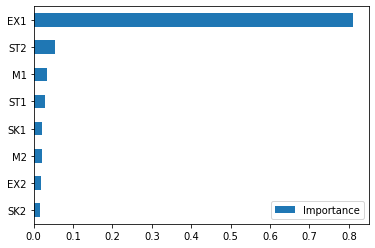

In [7]:
df = pd.DataFrame({'M1':X[:,0],'ST1':X[:,1],'EX1':X[:,2],'SK1':X[:,3],'M2':X[:,4],'ST2':X[:,5],'EX2':X[:,6],'SK2':X[:,7]})
plot_variable_importance(df,Y)

In [8]:
LDA = QuadraticDiscriminantAnalysis()
cross_val_score(LDA , X_train, Y_train, cv=5, scoring="accuracy")

array([0.97346369, 0.96368715, 0.966946  , 0.9655333 , 0.96134141])

In [9]:
Y_train_pred = cross_val_predict(LDA , X_train, Y_train, cv=5)

In [10]:
confusion_matrix(Y_train, Y_train_pred)

array([[9479,  214],
       [ 149,  896]])

In [11]:
precision_score(Y_train, Y_train_pred)

0.8072072072072072

In [12]:
recall_score(Y_train, Y_train_pred)

0.8574162679425837

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      6566
           1       0.78      0.85      0.81       594

    accuracy                           0.97      7160
   macro avg       0.88      0.91      0.90      7160
weighted avg       0.97      0.97      0.97      7160

Confusion matrix
[[6424  142]
 [  89  505]]


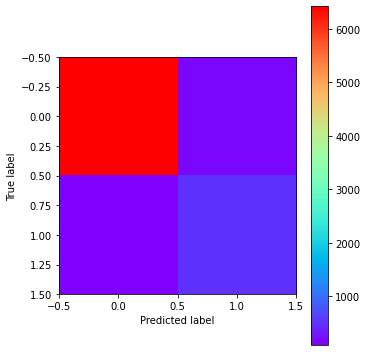

In [13]:
LDA.fit(X_train,Y_train)

Y_test_pred = LDA.predict(X_test)

plotCM(Y_test, Y_test_pred)

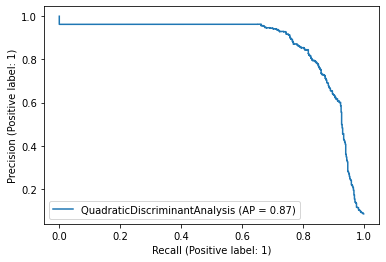

In [14]:
metrics.plot_precision_recall_curve(LDA, X_test, Y_test)  
plt.show()

In [15]:
rf = RandomForestClassifier(n_estimators=200,min_samples_split=5, max_features=4, max_depth=110, n_jobs=-1)

cross_val_score(rf , X_train, Y_train, cv=5, scoring="accuracy")

array([0.98463687, 0.97951583, 0.98184358, 0.97531439, 0.97810899])

In [16]:
Y_train_pred1 = cross_val_predict(rf , X_train, Y_train, cv=5)

confusion_matrix(Y_train, Y_train_pred1)

array([[9628,   65],
       [ 153,  892]])

In [17]:
precision_score(Y_train, Y_train_pred1)

0.9320794148380356

In [18]:
recall_score(Y_train, Y_train_pred1)

0.8535885167464115

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6566
           1       0.92      0.84      0.88       594

    accuracy                           0.98      7160
   macro avg       0.95      0.92      0.93      7160
weighted avg       0.98      0.98      0.98      7160

Confusion matrix
[[6523   43]
 [  95  499]]


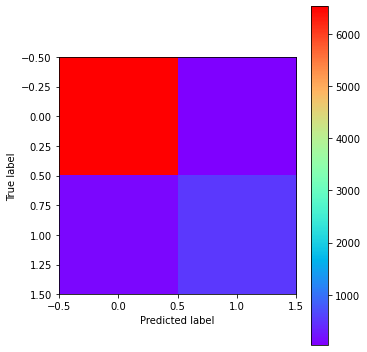

In [19]:
rf.fit(X_train,Y_train)

Y_test_pred1 = rf.predict(X_test)

plotCM(Y_test, Y_test_pred1)

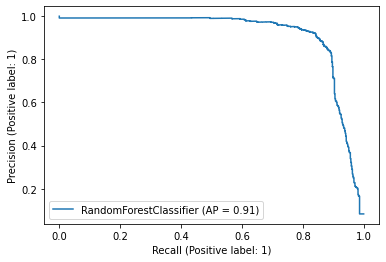

In [20]:
metrics.plot_precision_recall_curve(rf, X_test, Y_test)  
plt.show()

In [21]:
index_names = data[ data['C'] == 0 ].index
data.drop(index_names, inplace = True)

In [22]:
data.head()

,M1,ST1,EX1,SK1,M2,ST2,EX2,SK2,C
19,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1
42,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1
61,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1
92,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,1
93,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048,1


In [23]:
len(data)

1639

In [24]:
X = data.drop(['C'],axis=1)
X

,M1,ST1,EX1,SK1,M2,ST2,EX2,SK2
19,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680
42,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029
61,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920
92,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848
93,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048
...,...,...,...,...,...,...,...,...
17515,89.867188,47.482295,1.591325,2.505057,0.763378,12.393561,17.940745,333.902630
17529,27.039062,33.754722,4.779124,26.255357,129.863712,78.815440,-0.348492,-0.893791
17558,77.070312,39.000638,1.884421,6.372178,38.517559,65.741059,1.589513,1.285346
17642,28.375000,27.649311,6.377273,45.944048,141.860368,82.893017,-0.477222,-1.067880


In [25]:
pca = PCA(n_components=2)
pca.fit(X)

# Print the components and the amount of variance in the data contained in each dimension

# print(pca.components_)
print(pca.explained_variance_)

[3788.37666039 1550.22704621]


In [26]:
pc_df = pd.DataFrame(pca.components_[:2], columns=['M1','ST1','EX1','SK1','M2','ST2','EX2','SK2'],
                    index={'p1', 'p2'})
pc_df

,M1,ST1,EX1,SK1,M2,ST2,EX2,SK2
p2,0.317488,0.032670,-0.018569,-0.119441,-0.576527,-0.257637,0.048682,0.694546
p1,-0.242857,-0.000021,0.013911,0.095898,0.662987,0.057755,0.008253,0.699053


In [27]:
columns = ['principal component 1', 'principal component 2']
df_pca = pd.DataFrame(pca.transform(X), columns=columns, index=X.index)
df_pca.head()

,principal component 1,principal component 2
19,16.583651,-35.920948
42,197.199266,84.528565
61,-38.815456,13.130286
92,-89.107525,62.317365
93,53.098333,-33.372142


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

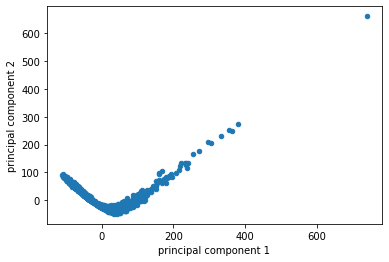

In [28]:
df_pca.plot(kind="scatter", x="principal component 1", y="principal component 2")

In [29]:
kmeans = cluster.KMeans(n_clusters=3)
clusters = kmeans.fit(X)
print(clusters)

KMeans(n_clusters=3)


In [30]:
label = kmeans.fit_predict(X)
kmeans.cluster_centers_

array([[ 69.15822318,  39.23897791,   2.39446565,  10.59950624,
         20.62712378,  48.47503356,   3.71108845,  18.83685832],
       [ 34.4267185 ,  37.42274371,   4.4405044 ,  24.25917175,
         99.05756036,  72.0981401 ,   0.43169994,  -0.33025   ],
       [ 94.92737926,  45.19050457,   0.94048641,   2.35105408,
          1.34641988,  12.84096791,  14.45794519, 255.63836522]])

In [31]:
kmeans.labels_

array([0, 2, 1, ..., 0, 1, 1], dtype=int32)

In [32]:
c0,c1,c2=0,0,0

for i in label:
    if i==0:
        c0+=1
    elif i==1:
        c1+=1
    else:
        c2+=1
print(c0,c1,c2)

974 621 44


In [33]:
df_pca['c']=label

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

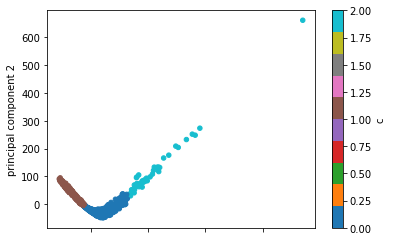

In [34]:
df_pca.plot(kind="scatter", x="principal component 1", y="principal component 2", c='c',cmap=plt.get_cmap("tab10"))

In [35]:

silhouette_avg = silhouette_score(X, label)
silhouette_avg

0.4413195575312856

In [36]:
ac = cluster.AgglomerativeClustering(n_clusters=3)
labels = ac.fit_predict(X)

clf = NearestCentroid()
clf.fit(X, labels)
print(clf.centroids_)

[[ 7.08773580e+01  3.95018295e+01  2.24578883e+00  9.41862202e+00
   1.81930324e+01  4.63944326e+01  3.94910398e+00  2.08200122e+01]
 [ 3.70798768e+01  3.73577335e+01  4.34327069e+00  2.38438139e+01
   9.14117590e+01  7.14058523e+01  5.94136768e-01 -7.33523453e-03]
 [ 9.44705669e+01  4.51444539e+01  9.50540032e-01  2.39308408e+00
   1.34140935e+00  1.27654995e+01  1.45333002e+01  2.58497647e+02]]


In [37]:
c0,c1,c2=0,0,0

for i in labels:
    if i==0:
        c0+=1
    elif i==1:
        c1+=1
    else:
        c2+=1
print(c0,c1,c2)

878 718 43


In [38]:
df_pca['c']=labels

<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

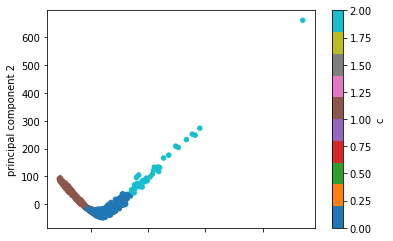

In [39]:
df_pca.plot(kind="scatter", x="principal component 1", y="principal component 2", c='c',cmap=plt.get_cmap("tab10"))

In [40]:
silhouette_avg = silhouette_score(X, labels)
silhouette_avg

0.41145227639096904